# Convolutional Neural Network Architecture
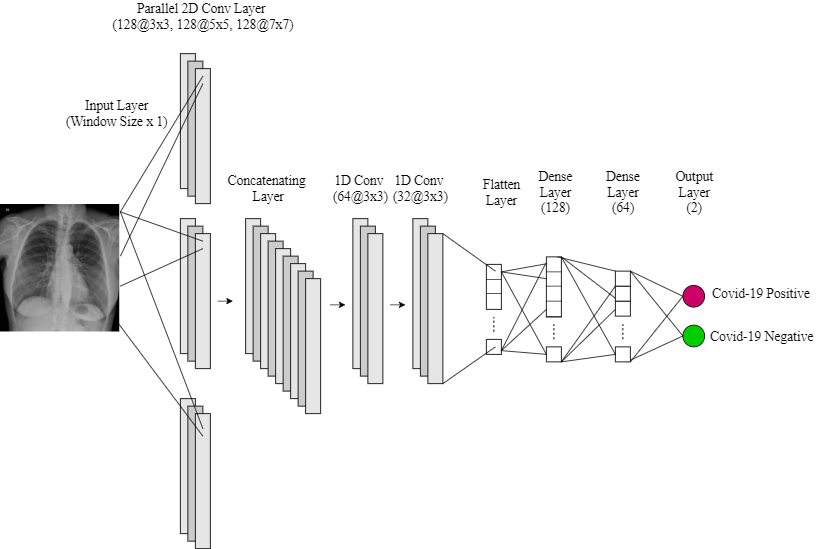

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
print(data)

[[[[0.00784314]
   [0.00392157]
   [0.00392157]
   ...
   [0.67843137]
   [0.71372549]
   [0.74117647]]

  [[0.02745098]
   [0.02745098]
   [0.03137255]
   ...
   [0.65882353]
   [0.68627451]
   [0.71764706]]

  [[0.09019608]
   [0.09411765]
   [0.08627451]
   ...
   [0.64705882]
   [0.67843137]
   [0.70980392]]

  ...

  [[0.78039216]
   [0.78823529]
   [0.79215686]
   ...
   [0.75686275]
   [0.77647059]
   [0.74901961]]

  [[0.78823529]
   [0.78431373]
   [0.8       ]
   ...
   [0.74901961]
   [0.76862745]
   [0.7254902 ]]

  [[0.81176471]
   [0.8       ]
   [0.81176471]
   ...
   [0.74509804]
   [0.76078431]
   [0.70196078]]]


 [[[0.16078431]
   [0.05490196]
   [0.04705882]
   ...
   [0.05882353]
   [0.0627451 ]
   [0.0627451 ]]

  [[0.1372549 ]
   [0.05490196]
   [0.05490196]
   ...
   [0.05882353]
   [0.05490196]
   [0.05882353]]

  [[0.1254902 ]
   [0.05098039]
   [0.04705882]
   ...
   [0.05490196]
   [0.05098039]
   [0.05490196]]

  ...

  [[0.1372549 ]
   [0.20392157]
   [0.2

In [3]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(input=inp, output=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
/home/ni.yadav2/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
/home/ni.yadav2/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 5, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
/home/ni.yadav2/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 7, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
/home/ni.yadav2/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)       

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
historOy=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Train on 975 samples, validate on 109 samples
Epoch 1/20
975/975 [==============================] - 134s 138ms/step - loss: 0.7005 - accuracy: 0.5374 - val_loss: 0.6850 - val_accuracy: 0.5963
Epoch 2/20
975/975 [==============================] - 135s 139ms/step - loss: 0.6881 - accuracy: 0.5538 - val_loss: 0.6867 - val_accuracy: 0.5963
Epoch 3/20
975/975 [==============================] - 136s 140ms/step - loss: 0.6900 - accuracy: 0.5538 - val_loss: 0.6861 - val_accuracy: 0.5872
Epoch 4/20
975/975 [==============================] - 133s 137ms/step - loss: 0.6836 - accuracy: 0.5467 - val_loss: 0.6738 - val_accuracy: 0.5688
Epoch 5/20
975/975 [==============================] - 132s 135ms/step - loss: 0.6739 - accuracy: 0.5569 - val_loss: 0.6620 - val_accuracy: 0.5780
Epoch 6/20
975/975 [==============================] - 139s 143ms/step - loss: 0.6804 - accuracy: 0.5538 - val_loss: 0.6683 - val_accuracy: 0.5688
Epoch 7/20
975/975 [==============================] - 133s 137ms/step - loss: 

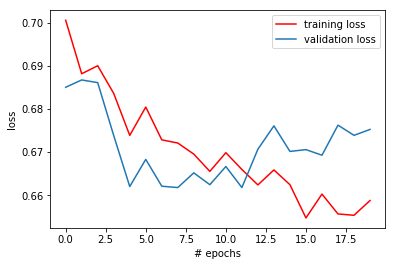

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

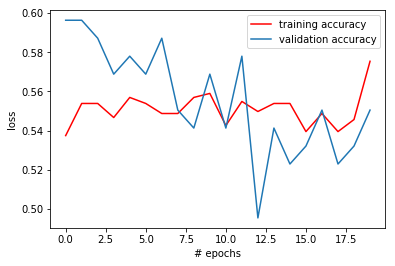

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

121/121 [==============================] - 3s 26ms/step
[0.6771798823490616, 0.5289255976676941]
